<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/02_Neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Regression With Tensorflow**

| Hyperparameter | Typical Values |
|---|---|
| **Input Layer Shape** | Same shape as number of features (e.g. 3 for #bedrooms, #bathrooms, #car spaces in housing price prediction |
| Hidden Layers | Problem specific, minimum=1, maximum=unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually `ReLU`(rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss Function | `MSE`(mean squared error) or `MAE`(mean absolute error)/`Huber`(combination of MAE/MSE) if outliers |
| Optimizer | `SGD`(stochastic gradient descent), `Adam` |



# **Introduction to Regression with Neural Networks in TensorFlow**

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, evern shorter.... predicting a number

In [1]:
# Importing tensorflow
import tensorflow as tf
print("Tensorflow version we're using: ", tf.__version__)

Tensorflow version we're using:  2.18.0


## Creating data to view and fit

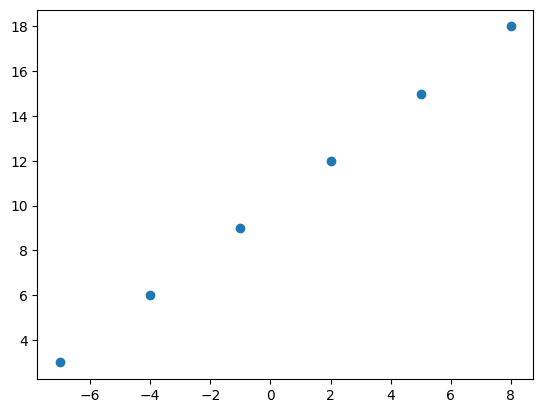

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0])

# Visualize it
plt.scatter(X, y)

In [3]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18.])

In [4]:
y == X + 10  # This is the relationship between our dependent variable(y) and independent variable(x)

array([ True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# Create a tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant(654332)
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=654332>)

##### From this above house price cell we know about the shapes of both features and labels. Here `house_info` is our feature deriving the `house_price` which is our label our output we can say.

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((6,), (6,))

In [7]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [8]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

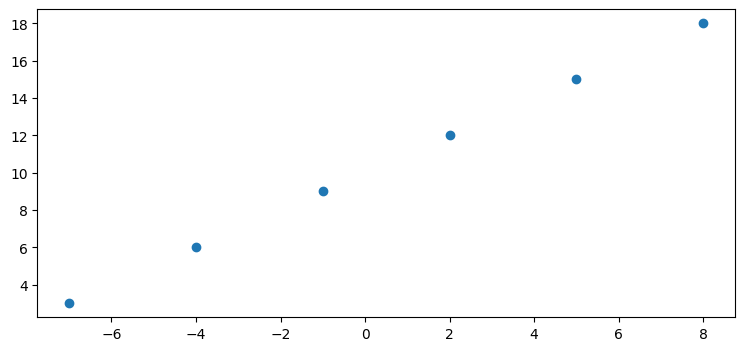

In [10]:
plt.figure(figsize=(9,4))
plt.scatter(X,y)

## Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the functio which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)


In [11]:
# set random_seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.8906 - mae: 9.8906
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 9.8781 - mae: 9.8781
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 9.8656 - mae: 9.8656
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 9.8531 - mae: 9.8531
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 9.8406 - mae: 9.8406


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [13]:
# Try and make a prediction using our model
y_pred = model.predict(tf.constant([11.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


array([[13.732431]], dtype=float32)

## Improving our model

As we can above that from the above pattern at [11.0] our model predicted value should be 21....  but it is not giving exactly what we want.
Hence, it's time to improve our model.


We can improve our model, by altering the steps we took to create a model.

1. `Creating a model` - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. `Compiling a model` - here we might change the optimzation function or perhaps the **learning rate** of the optimzation function.
3. `Fitting a model` - here we might fit a model for more **epochs** (leave it training for lomger) or on more data (give the model more examples to learn from).

In [14]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the mode (this time we'll train for the longer time)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step - loss: 10.6986 - mae: 10.6986
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 10.6861 - mae: 10.6861
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 10.6736 - mae: 10.6736
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 10.6611 - mae: 10.6611
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 10.6486 - mae: 10.6486
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 10.6361 - mae: 10.6361
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.6236 - mae: 10.6236
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 10.6111 - mae: 10.6111
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 10.5986 - mae: 10.5986
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 10.5861 - mae: 10.5861
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 10.5736 - mae: 10.5736
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 10.5611 - mae: 10.5611
Epoch 13/100
1/1

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [16]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([11.0]))  # Now we should get output close to 21

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[2.1313047]], dtype=float32)

In [17]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y , epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - loss: 10.3617 - mae: 10.3617
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.1655 - mae: 10.1655
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.9742 - mae: 9.9742
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.7808 - mae: 9.7808
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 9.5891 - mae: 9.5891
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 9.4259 - mae: 9.4259
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.3202 - mae: 9.3202
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.2168 - mae: 9.2168
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.1218 - mae: 9.1218
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 9.0132 - mae: 9.0132
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.9050 - mae: 8.9050
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.7955 - mae: 8.7955
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43m

In [18]:
X, y

(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8.])>,
 <tf.Tensor: shape=(6,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18.])>)

In [19]:
# Let's predict now
model.predict(tf.constant([11.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[24.793772]], dtype=float32)

## Evaluating a model


In practice, a typical workflow you'll go through when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it-> tweak a model -> fit it -> evaluate it....
```

When it comes to evaluation.... there are 3 words you should memorize:
> "Visualize, Visualize, Visualize"


It's good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predicitons of a model line up against the ground truth(the original labels)?

In [20]:
# Make a bigger dataset
X = tf.range(-200, 200, 5) # from -200 to 200 with a step of 5
X

<tf.Tensor: shape=(80,), dtype=int32, numpy=
array([-200, -195, -190, -185, -180, -175, -170, -165, -160, -155, -150,
       -145, -140, -135, -130, -125, -120, -115, -110, -105, -100,  -95,
        -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,
        -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,   10,   15,
         20,   25,   30,   35,   40,   45,   50,   55,   60,   65,   70,
         75,   80,   85,   90,   95,  100,  105,  110,  115,  120,  125,
        130,  135,  140,  145,  150,  155,  160,  165,  170,  175,  180,
        185,  190,  195], dtype=int32)>

In [21]:
# Make labels for the data
y = X + 10
y

<tf.Tensor: shape=(80,), dtype=int32, numpy=
array([-190, -185, -180, -175, -170, -165, -160, -155, -150, -145, -140,
       -135, -130, -125, -120, -115, -110, -105, -100,  -95,  -90,  -85,
        -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,  -35,  -30,
        -25,  -20,  -15,  -10,   -5,    0,    5,   10,   15,   20,   25,
         30,   35,   40,   45,   50,   55,   60,   65,   70,   75,   80,
         85,   90,   95,  100,  105,  110,  115,  120,  125,  130,  135,
        140,  145,  150,  155,  160,  165,  170,  175,  180,  185,  190,
        195,  200,  205], dtype=int32)>

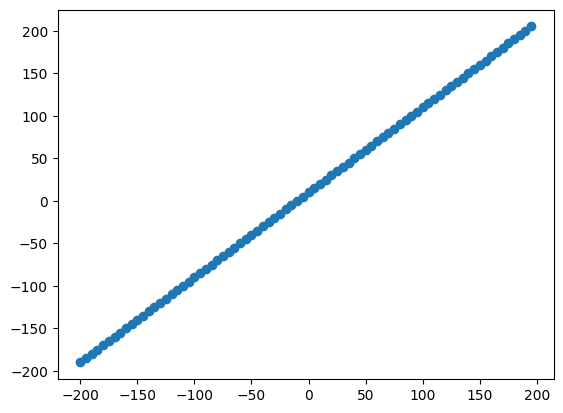

In [22]:
# Visualize the data
plt.scatter(X, y)

 ### The 3 sets..

 * **Traning set** - the model learns from this data, which is typically 70-80% of the total data you have available.
 * **Validation set** - The model gets tuned on this data, which is typically 10-15% of the data available.
 * **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total available data.

In [23]:
# Check the length of how many samples we have
len(X)

80

In [24]:
# Splitting the data into train and test sets
X_train =  X[:60]
y_train = y[:60]

X_test = X[60:]
y_test = y[60:]

len(X_train), len(X_test), len(y_train), len(y_test)

(60, 20, 60, 20)

### Visualizing the data

Now we've got out data in training and test sets... let's visualize it again!

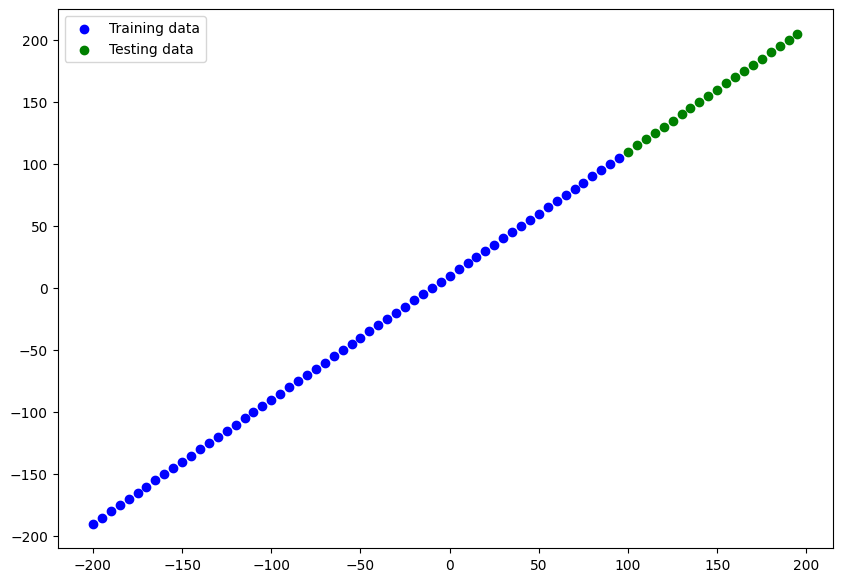

In [25]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X what's y?)
plt.legend()

In [26]:
# Let's have a look at how to build a neural network for our data

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Let's create a model which builds automatically by defining the input_shape into first layer
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2, Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parans**- these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [30]:
# Let's fit our model to training data
model.fit(X_train, y_train, epochs=100, verbose=0)

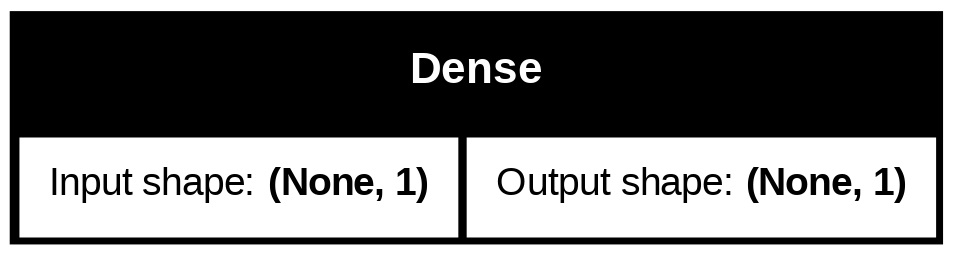

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [32]:
# Let's more specify our layers
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[1], name="input_layer1", activation="relu"), # giving layer 1 name
    tf.keras.layers.Dense(1, name="output_layer") # giving layer 2 name
], name="model_with_layers") # giving model name

# 2, Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "model_with_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer1 (Dense)            │ (None, 30)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(X_train, y_train, epochs=100, verbose=0)

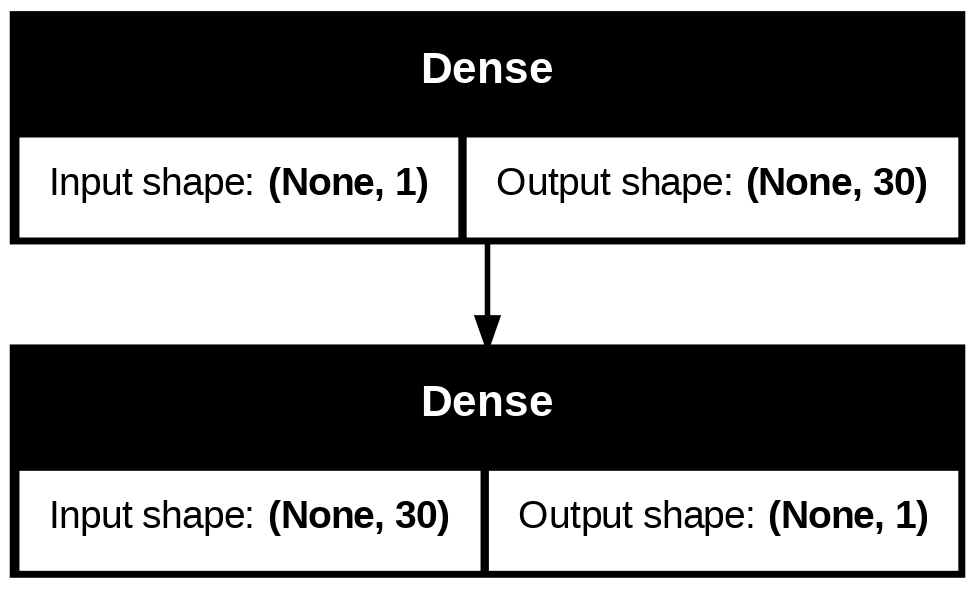

In [35]:
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions


To visualize predictions, it's a good idea to plot them against truth labels.

Often you'll see this in the form of `y_test` or `y_true` versues `y_pred` (ground truth versues model's predictions).

In [36]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[115.43137 ],
       [121.16315 ],
       [126.894905],
       [132.6267  ],
       [138.35846 ],
       [144.09024 ],
       [149.82199 ],
       [155.55377 ],
       [161.28555 ],
       [167.01732 ],
       [172.74907 ],
       [178.48085 ],
       [184.21262 ],
       [189.94441 ],
       [195.67616 ],
       [201.40794 ],
       [207.13971 ],
       [212.87149 ],
       [218.60326 ],
       [224.33502 ]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170,
       175, 180, 185, 190, 195, 200, 205], dtype=int32)>

**Note**: If you feel like you're going to reuse some kind of functionality in the future, it's good idea to turn it into a function

In [38]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to groudnd truth labels
  """

  plt.figure(figsize=(10,7))
  # Plot training data into blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data into green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

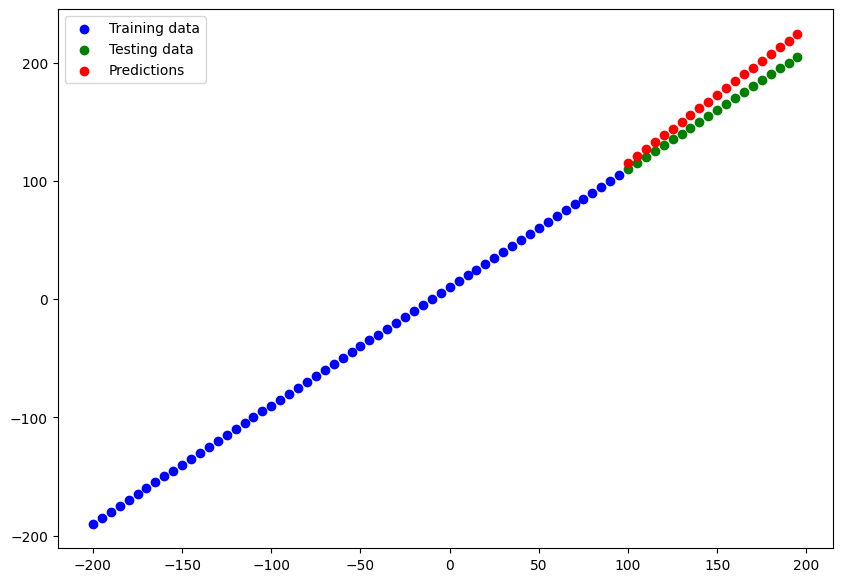

In [39]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions".
* **MSE** - Mean square root, "square the average errors"

In [40]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 12.3832 - mae: 12.3832


[12.383199691772461, 12.383199691772461]

In [41]:
# Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()(y_true = y_test,
                                     y_pred = y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=12.383199691772461>

In [42]:
tf.constant(y_pred)

<tf.Tensor: shape=(20, 1), dtype=float32, numpy=
array([[115.43137 ],
       [121.16315 ],
       [126.894905],
       [132.6267  ],
       [138.35846 ],
       [144.09024 ],
       [149.82199 ],
       [155.55377 ],
       [161.28555 ],
       [167.01732 ],
       [172.74907 ],
       [178.48085 ],
       [184.21262 ],
       [189.94441 ],
       [195.67616 ],
       [201.40794 ],
       [207.13971 ],
       [212.87149 ],
       [218.60326 ],
       [224.33502 ]], dtype=float32)>

In [43]:
y_test

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170,
       175, 180, 185, 190, 195, 200, 205], dtype=int32)>

In [44]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([115.43137 , 121.16315 , 126.894905, 132.6267  , 138.35846 ,
       144.09024 , 149.82199 , 155.55377 , 161.28555 , 167.01732 ,
       172.74907 , 178.48085 , 184.21262 , 189.94441 , 195.67616 ,
       201.40794 , 207.13971 , 212.87149 , 218.60326 , 224.33502 ],
      dtype=float32)>

In [45]:
# Calculate the mean absolute error
mae = tf.metrics.MeanAbsoluteError()(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred)) # Squeeze y_pred to match y_true shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=12.383199691772461>

In [46]:
# Mean squared error
mse = tf.metrics.MeanSquaredError()(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=171.1486358642578>

In [47]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.MeanAbsoluteError()(y_true = y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.MeanSquaredError()(y_true = y_true,
                                        y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model



```
Build a model -> evaluate it -> tweak it -> fit it -> tweak it -> .....
```

1. Get more data - get more examples for your example to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.


Let's do 3 modelling experiments:
1. `model 1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model 2` - 2 layers, trained for 100 epochs.
3. `model 3` - 2 layers, trained for 500 epochs

#### **Build model_1**

In [48]:
# Setting random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


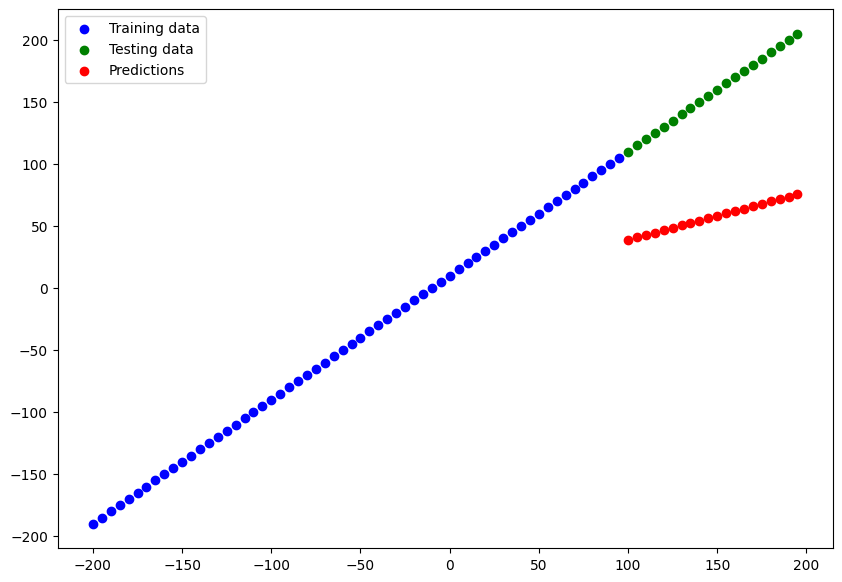

In [49]:
# Make and plot predicitons for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [50]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=100.21804809570312>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10356.8203125>)

#### **Build model_2**

In [51]:
# 2 dense layers, trained for 100 epochs
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1),
])

# 2. Compiling a model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fitting the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


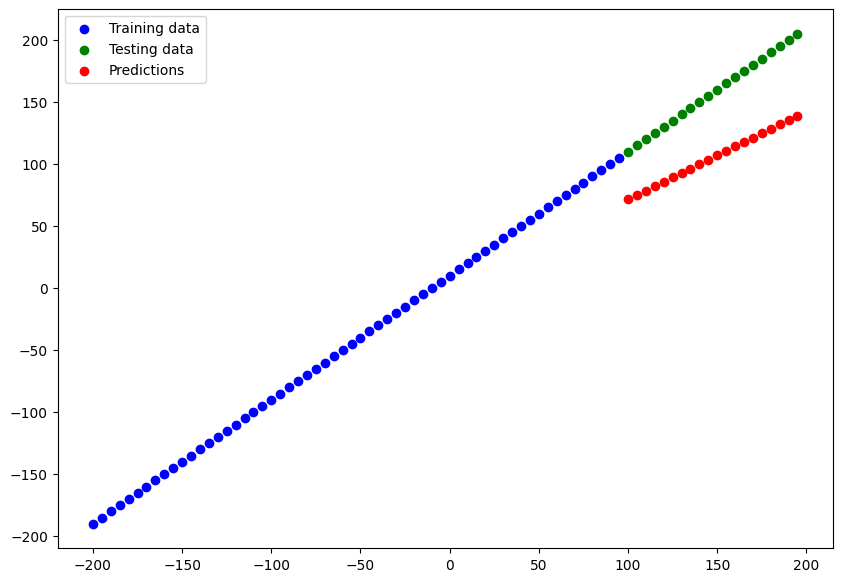

In [52]:
# Make and plot predictions for model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [53]:
# Evaluation metrics for model_2
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=52.241188049316406>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2798.9658203125>)

### **Build model_3**

In [54]:
# 2 layers trained for 500 epochs
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1),
])

# 2. Compiling a model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),  # changing optimizer to Adan
                metrics=["mae"])

# 3. Fitting the model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


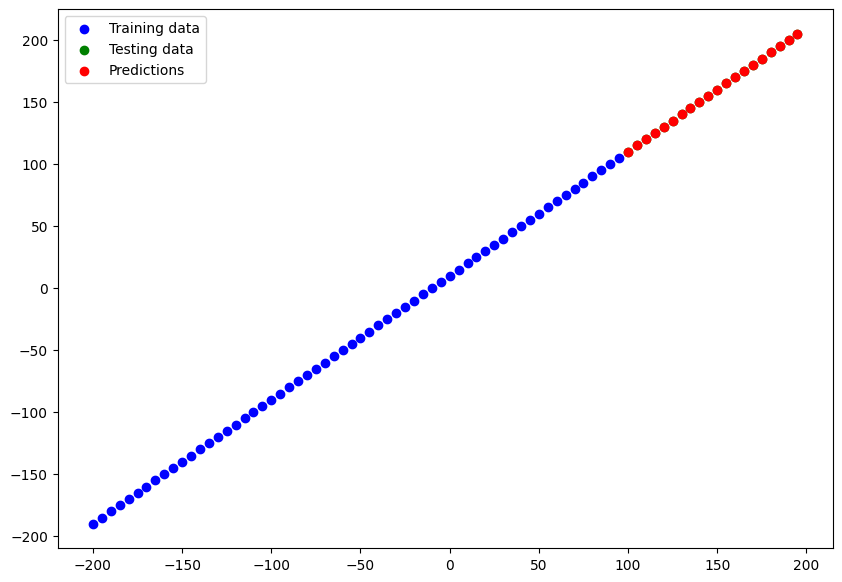

In [55]:
# Make and plot predictions for model_2
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [56]:
# Calculating metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.04198036342859268>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.001828978769481182>)

## Comparing the results of our experiments

We've run the few experiments now, let's compare them now.

In [57]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["MODEL",
                                                   "MeanAbsoluteError (MAE)",
                                                   "MeanSquaredError (MSE)"])
all_results

,MODEL,MeanAbsoluteError (MAE),MeanSquaredError (MSE)
0,model_1,100.218048,10356.820312
1,model_2,52.241188,2798.965820
2,model_3,0.041980,0.001829


We can see our `model_3` is the best perfomer here

In [58]:
model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

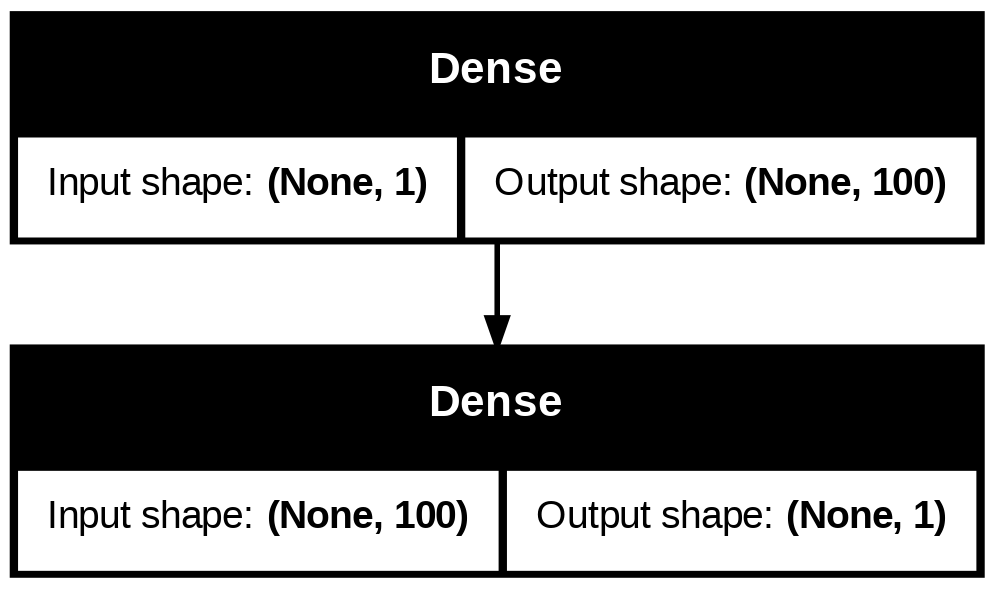

In [59]:
plot_model(model=model_3, show_shapes=True)

> **Note** : One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.
Remember the machine learning practioner's motto: "*Experiment, Experiment Experiment*

## Tracking your experiments

One really goot habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource**: As you build more models, you'll want to look into using:

* `TensorBoard` - a component of TensorFlow library to help track modelling experiments.
* `Weights & Biases` - a tool for tracking all kinds of machine learning experiments (plugs directly into TensorBoard).

## Saving our models


Saving our models allows us to use them outside of Goggle Colab (or wherever they were trained) such as in web application or a mobile app.


There are two main formats we can save our model's too:
1. The SavedModel Format
2. The HDF5 format

In [60]:
# Saving the model in SavedModel format
# model_3.save('model_3_SavedModel_Format', save_format='tf')
# This way is deprecated

model_3.export('model_3_SavedModel_Format')

Saved artifact at 'model_3_SavedModel_Format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_17')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139848379564496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139848379566032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139848379565840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139848379564304: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [61]:
# Saving the model is HDF5 format
model_3.save('model_3_HDF5_Format.h5')

## Loading in a saved model

In [63]:
# Load in the saved model
loaded_SavedModel_format = tf.keras.models.load_model("model_3_SavedModel_Format")
loaded_SavedModel_format

ValueError: File format not supported: filepath=model_3_SavedModel_Format. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(model_3_SavedModel_Format, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

### Looks like it got deprecated..

In [64]:
# Load in the saved model using HDF5 format
loaded_HDF5_model = tf.keras.models.load_model('/content/model_3_HDF5_Format.h5')
loaded_HDF5_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [65]:
model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

In [66]:
# Compare model_3 prediction with saved HDF5 model
model_3_preds = model_3.predict(X_test)
loaded_HDF5_model_preds = loaded_HDF5_model.predict(X_test)
model_3_preds == loaded_HDF5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google colab:

1. You can go to the "files" tab rand right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Goo

In [67]:
# Download a file from Google colab
from google.colab import files
files.download("/content/model_3_HDF5_Format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>